In [3]:
import glob
import matplotlib.pyplot as plt

from matplotlib import rc

rc('text', usetex=True)
import numpy as np

In [2]:
def create_eps_graph(shape, names, folder = 'param_search', factor = 1, yaxis = 'Worst Case Accuracy (\%)', move = 0, no_legend = False, flip = [], font_size = 14, s1 = 5):
    plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True)
    plt.rcParams.update({'font.size': font_size})
    plt.rc('grid', color='w', linestyle='solid')
    fig, axs = plt.subplots(*shape, figsize = ((shape[1]) * s1, (shape[0]) * 5))
    data = {}
    for i, (formal_name, name) in enumerate(names.items()):
        data[formal_name] = {}
        current_list = glob.glob(f'{folder}/{name}*.dat')
        xs = []
        ind_verifieds = []
        base_verifieds = []
        uap_verifieds = []
        for file in current_list:
            f = open(file, "r")
            lines = f.readlines()
            eps = float(lines[-6].split(' ')[-1][:-1])
            xs.append(eps)
            ind_verified = float(lines[-5].split(' ')[-1][:-1])/factor
            ind_verifieds.append(ind_verified)
            base_verified = float(lines[-4].split(' ')[-1][:-1])/factor
            base_verifieds.append(base_verified)    
            uap_verified = float(lines[-3].split(' ')[-1][:-1])/factor
            uap_verifieds.append(uap_verified)
            print(file, eps, (ind_verified, base_verified, uap_verified))
            data[formal_name][eps] = (ind_verified, base_verified, uap_verified)
            #times = list(lines[-1].split(' ')[-1][:-1])
            #print(eps, ind_verified, base_verified, uap_verified, times)
            #print(lines[-6:])
        if not xs:
            xs = [0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045]
            ind_verifieds = [0 for _ in range(8)]
            base_verifieds = [0 for _ in range(8)]
            uap_verifieds = [0 for _ in range(8)]
        else:
            idx = sorted(range(len(xs)), key=lambda k: xs[k])
            xs = [xs[j] for j in idx]
            if len(flip) != 0:
                ind_verifieds = [flip[i] - ind_verifieds[j] for j in idx]
                base_verifieds = [flip[i] - base_verifieds[j] for j in idx]
                uap_verifieds = [flip[i] - uap_verifieds[j] for j in idx]
            else:
                ind_verifieds = [ind_verifieds[j] for j in idx]
                base_verifieds = [base_verifieds[j] for j in idx]
                uap_verifieds = [uap_verifieds[j] for j in idx]
        if len(names) == 1:
            axs.plot(xs, ind_verifieds, label='Individual', linestyle = '-', marker = 'o', color='cornflowerblue')
            axs.plot(xs, base_verifieds, label='Input/Ouput Formulation', linestyle = '-', marker = 's', color='indianred')
            axs.plot(xs, uap_verifieds, label='RaVeN', linestyle = '-', marker = '*', color='darkseagreen')
            if not no_legend:
                if len(flip) != 0:
                    axs.legend(loc="lower right")
                else:
                    axs.legend(loc="upper right")
            #axs.set_xlabel('Epsilon')
            axs.set_xlabel(r'\begin{center}Epsilon\\*{' + chr(97+move + i) + '}) {' + formal_name + '}\end{center}')
            #axs.set_xlabel(r'\begin{center}Epsilon\\*{' + formal_name + '}\end{center}')
            axs.set_ylabel(yaxis)
            #axs.set_ylim(0, 100)  
        elif shape[0] == 1:
            axs[i].plot(xs, ind_verifieds, label='Individual', linestyle = '-', marker = 'o', color='cornflowerblue')
            axs[i].plot(xs, base_verifieds, label='Input/Ouput Formulation', linestyle = '-', marker = 's', color='indianred')
            axs[i].plot(xs, uap_verifieds, label='RaVeN', linestyle = '-', marker = '*', color='darkseagreen')
            if i == 0:
                if len(flip) != 0:
                    axs[i].legend(loc="lower right")
                else:
                    axs[i].legend(loc="upper right")
            axs[i].set_xlabel(r'\begin{center}Epsilon\\*{' + chr(97 + i) + '}) {' + formal_name + '}\end{center}')
            axs[i].set_ylabel(yaxis)
            #axs[i].set_ylim(0, 100)
        else:
            axs[int(i/shape[1])][int(i%shape[1])].plot(xs, ind_verifieds, label='Individual', linestyle = '-', marker = 'o', color='cornflowerblue')
            axs[int(i/shape[1])][int(i%shape[1])].plot(xs, base_verifieds, label='Input/Ouput Formulation', linestyle = '-', marker = 's', color='indianred')
            axs[int(i/shape[1])][int(i%shape[1])].plot(xs, uap_verifieds, label='RaVeN', linestyle = '-', marker = '*', color='darkseagreen')
            if i == 0:
                if len(flip) != 0:
                    axs[int(i/shape[1])][int(i%shape[1])].legend(loc="lower right")
                else:
                    axs[int(i/shape[1])][int(i%shape[1])].legend(loc="upper right")
                
            axs[int(i/shape[1])][int(i%shape[1])].set_xlabel(r'\begin{center}Epsilon\\*{' + chr(97 + i) + '}) {' + formal_name + '}\end{center}')
            axs[int(i/shape[1])][int(i%shape[1])].set_ylabel(yaxis)
            #axs[int(i/shape[1])][int(i%shape[1])].set_ylim(0, 100)   
    


new_mnist_uap_results/mnist_relu_3_50.onnx_5_20_0.015.dat 0.015 (56.0, 58.0, 67.0)
new_mnist_uap_results/mnist_relu_3_50.onnx_5_20_0.035.dat 0.035 (0.0, 0.0, 2.0)
new_mnist_uap_results/mnist_relu_3_50.onnx_5_20_0.01.dat 0.01 (85.0, 85.0, 86.0)
new_mnist_uap_results/mnist_relu_3_50.onnx_5_20_0.025.dat 0.025 (13.0, 14.0, 18.0)
new_mnist_uap_results/mnist_relu_3_50.onnx_5_20_0.03.dat 0.03 (3.0, 3.0, 3.0)
new_mnist_uap_results/mnist_relu_3_50.onnx_5_20_0.02.dat 0.02 (27.0, 29.0, 37.0)
new_mnist_uap_results/mnist_relu_3_100.onnx_5_20_0.02.dat 0.02 (4.0, 4.0, 6.0)
new_mnist_uap_results/mnist_relu_3_100.onnx_5_20_0.025.dat 0.025 (1.0, 1.0, 2.0)
new_mnist_uap_results/mnist_relu_3_100.onnx_5_20_0.015.dat 0.015 (28.0, 30.0, 40.0)
new_mnist_uap_results/mnist_relu_3_100.onnx_5_20_0.03.dat 0.03 (0.0, 0.0, 0.0)
new_mnist_uap_results/mnist_relu_3_100.onnx_5_20_0.01.dat 0.01 (72.0, 72.0, 75.0)
new_mnist_uap_results/mnist_relu_3_100.onnx_5_20_0.035.dat 0.035 (0.0, 0.0, 0.0)


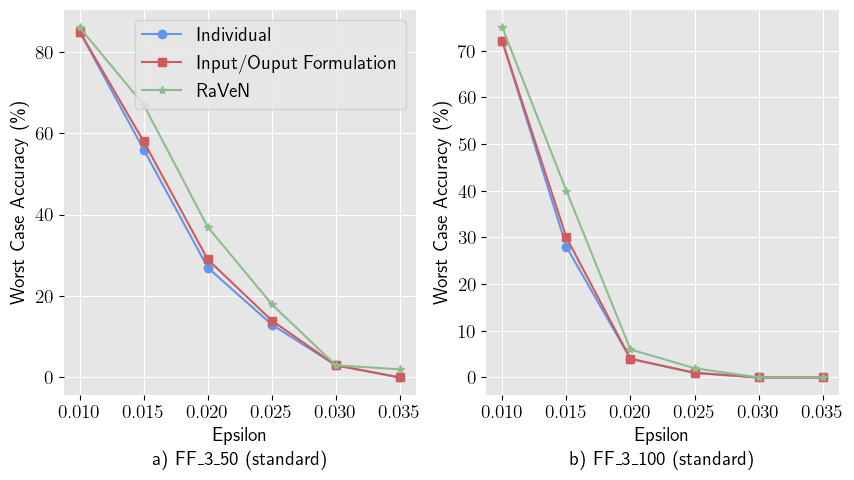

In [102]:
create_eps_graph([1,2], {'FF_3_50 (standard)': 'mnist_relu_3_50', 'FF_3_100 (standard)': 'mnist_relu_3_100'}, folder = 'new_mnist_uap_results')

wrong_mnist/mnist_relu_3_50.onnx_5_20_0.015.dat 0.015 (65.0, 68.0, 79.0)
wrong_mnist/mnist_relu_3_50.onnx_5_20_0.035.dat 0.035 (1.0, 1.0, 2.0)
wrong_mnist/mnist_relu_3_50.onnx_5_20_0.01.dat 0.01 (84.0, 85.0, 90.0)
wrong_mnist/mnist_relu_3_50.onnx_5_20_0.025.dat 0.025 (8.0, 8.0, 17.0)
wrong_mnist/mnist_relu_3_50.onnx_5_20_0.03.dat 0.03 (3.0, 3.0, 5.0)
wrong_mnist/mnist_relu_3_50.onnx_5_20_0.02.dat 0.02 (31.0, 35.0, 46.0)
wrong_mnist/mnist_relu_3_100.onnx_5_20_0.02.dat 0.02 (7.0, 7.0, 10.0)
wrong_mnist/mnist_relu_3_100.onnx_5_20_0.025.dat 0.025 (1.0, 1.0, 2.0)
wrong_mnist/mnist_relu_3_100.onnx_5_20_0.015.dat 0.015 (30.0, 31.0, 40.0)
wrong_mnist/mnist_relu_3_100.onnx_5_20_0.03.dat 0.03 (0.0, 0.0, 0.0)
wrong_mnist/mnist_relu_3_100.onnx_5_20_0.01.dat 0.01 (69.0, 70.0, 82.0)
wrong_mnist/mnist_relu_3_100.onnx_5_20_0.035.dat 0.035 (0.0, 0.0, 0.0)


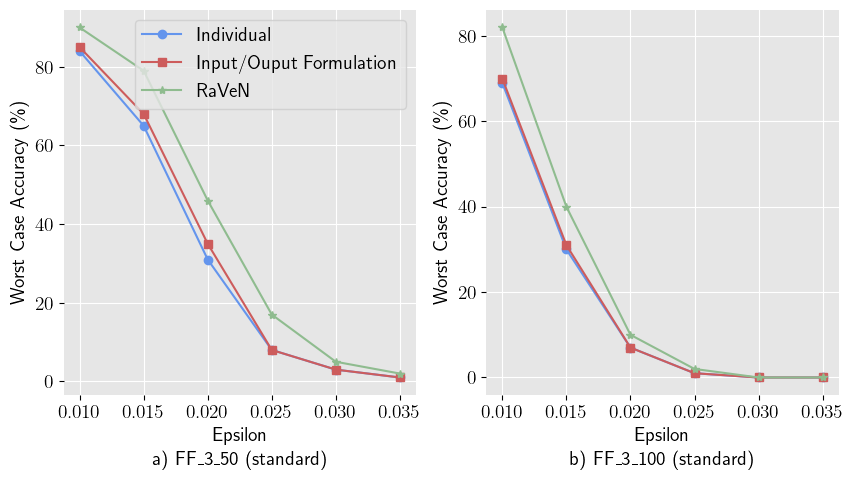

In [50]:
create_eps_graph([1,2], {'FF_3_50 (standard)': 'mnist_relu_3_50', 'FF_3_100 (standard)': 'mnist_relu_3_100'}, folder = 'wrong_mnist')

no_diff/mnist_relu_3_50.onnx_5_20_0.015.dat 0.015 (56.0, 56.0, 67.0)
no_diff/mnist_relu_3_50.onnx_5_20_0.035.dat 0.035 (0.0, 0.0, 2.0)
no_diff/mnist_relu_3_50.onnx_5_20_0.01.dat 0.01 (85.0, 85.0, 86.0)
no_diff/mnist_relu_3_50.onnx_5_20_0.025.dat 0.025 (13.0, 13.0, 18.0)
no_diff/mnist_relu_3_50.onnx_5_20_0.03.dat 0.03 (3.0, 3.0, 3.0)
no_diff/mnist_relu_3_50.onnx_5_20_0.02.dat 0.02 (27.0, 27.0, 35.0)
no_diff/mnist_relu_3_100.onnx_5_20_0.02.dat 0.02 (4.0, 4.0, 6.0)
no_diff/mnist_relu_3_100.onnx_5_20_0.025.dat 0.025 (1.0, 1.0, 2.0)
no_diff/mnist_relu_3_100.onnx_5_20_0.015.dat 0.015 (28.0, 28.0, 40.0)
no_diff/mnist_relu_3_100.onnx_5_20_0.03.dat 0.03 (0.0, 0.0, 0.0)
no_diff/mnist_relu_3_100.onnx_5_20_0.01.dat 0.01 (72.0, 72.0, 75.0)
no_diff/mnist_relu_3_100.onnx_5_20_0.035.dat 0.035 (0.0, 0.0, 0.0)


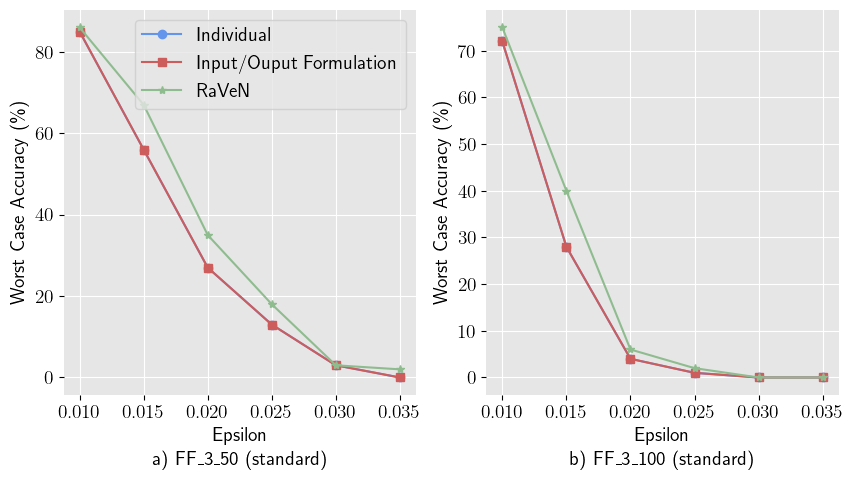

In [58]:
create_eps_graph([1,2], {'FF_3_50 (standard)': 'mnist_relu_3_50', 'FF_3_100 (standard)': 'mnist_relu_3_100'}, folder = 'no_diff')

mnist_uap_results/mnist_relu_3_50.onnx_5_20_0.015.dat 0.015 (56.0, 58.0, 67.0)
mnist_uap_results/mnist_relu_3_50.onnx_5_20_0.035.dat 0.035 (0.0, 0.0, 2.0)
mnist_uap_results/mnist_relu_3_50.onnx_5_20_0.01.dat 0.01 (85.0, 85.0, 86.0)
mnist_uap_results/mnist_relu_3_50.onnx_5_20_0.025.dat 0.025 (13.0, 14.0, 18.0)
mnist_uap_results/mnist_relu_3_50.onnx_5_20_0.03.dat 0.03 (3.0, 3.0, 3.0)
mnist_uap_results/mnist_relu_3_50.onnx_5_20_0.02.dat 0.02 (27.0, 29.0, 37.0)
mnist_uap_results/mnist_relu_3_100.onnx_5_20_0.02.dat 0.02 (4.0, 4.0, 6.0)
mnist_uap_results/mnist_relu_3_100.onnx_5_20_0.025.dat 0.025 (1.0, 1.0, 2.0)
mnist_uap_results/mnist_relu_3_100.onnx_5_20_0.015.dat 0.015 (28.0, 30.0, 41.0)
mnist_uap_results/mnist_relu_3_100.onnx_5_20_0.03.dat 0.03 (0.0, 0.0, 0.0)
mnist_uap_results/mnist_relu_3_100.onnx_5_20_0.01.dat 0.01 (72.0, 72.0, 75.0)
mnist_uap_results/mnist_relu_3_100.onnx_5_20_0.035.dat 0.035 (0.0, 0.0, 0.0)
mnist_uap_results/mnist_convSmallRELU__Point.onnx_5_20_0.075.dat 0.075 (35.0

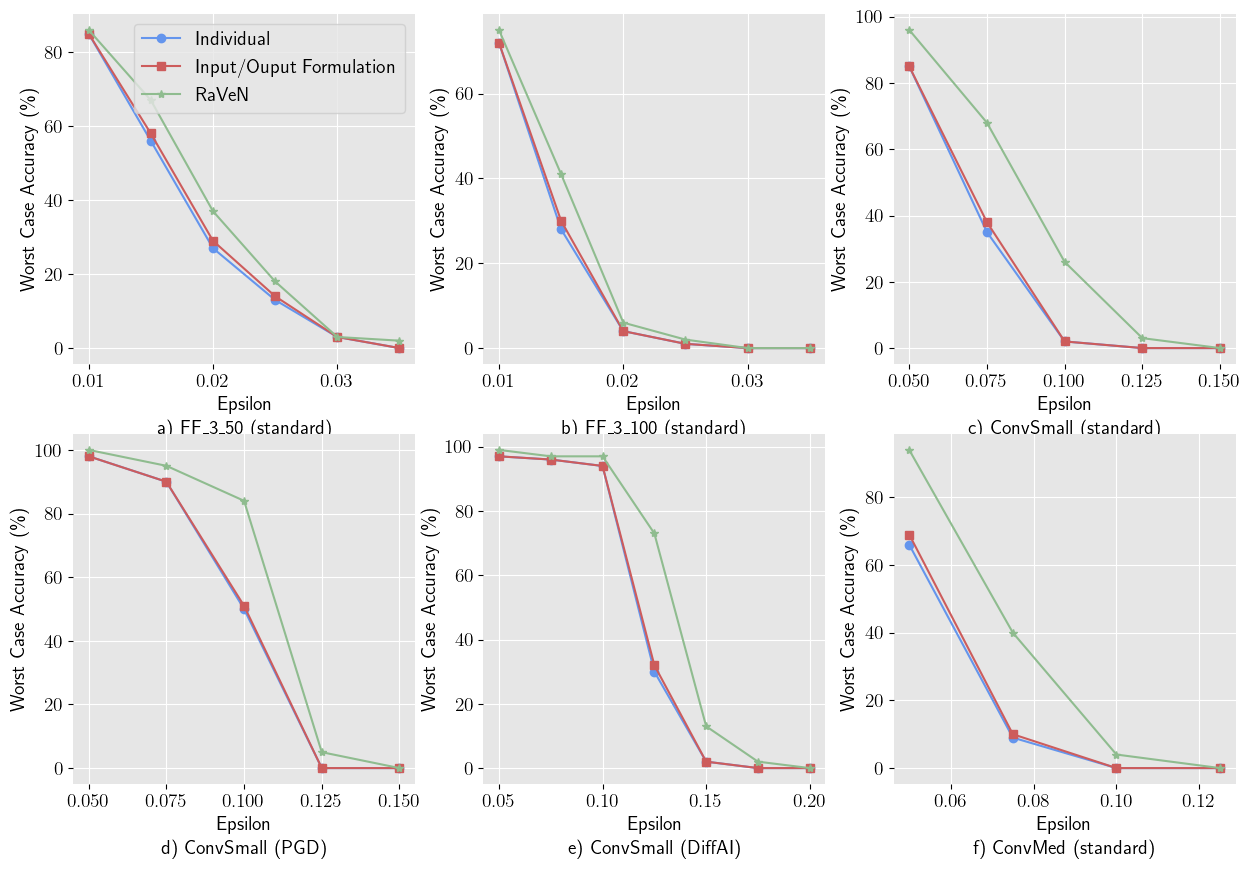

In [52]:
create_eps_graph([2, 3], {'FF_3_50 (standard)': 'mnist_relu_3_50', 'FF_3_100 (standard)': 'mnist_relu_3_100', 'ConvSmall (standard)': 'mnist_convSmallRELU__Point', 'ConvSmall (PGD)': 'mnistconvSmallRELU__PGDK', 'ConvSmall (DiffAI)': 'mnistconvSmallRELUDiffAI', 'ConvMed (standard)': 'mnistconvMedGRELU__Point'}, folder = 'mnist_uap_results')

mnist_uap_results/mnist_convSmallRELU__Point.onnx_5_20_0.075.dat 0.075 (35.0, 38.0, 68.00000788820208)
mnist_uap_results/mnist_convSmallRELU__Point.onnx_5_20_0.05.dat 0.05 (85.0, 85.0, 96.0)
mnist_uap_results/mnist_convSmallRELU__Point.onnx_5_20_0.1.dat 0.1 (2.0, 2.0, 26.0)
mnist_uap_results/mnist_convSmallRELU__Point.onnx_5_20_0.15.dat 0.15 (0.0, 0.0, 0.0)
mnist_uap_results/mnist_convSmallRELU__Point.onnx_5_20_0.125.dat 0.125 (0.0, 0.0, 3.0)
mnist_uap_results/mnistconvSmallRELU__PGDK.onnx_5_20_0.125.dat 0.125 (0.0, 0.0, 5.0)
mnist_uap_results/mnistconvSmallRELU__PGDK.onnx_5_20_0.1.dat 0.1 (50.0, 51.0, 84.0)
mnist_uap_results/mnistconvSmallRELU__PGDK.onnx_5_20_0.15.dat 0.15 (0.0, 0.0, 0.0)
mnist_uap_results/mnistconvSmallRELU__PGDK.onnx_5_20_0.075.dat 0.075 (90.0, 90.0, 95.0)
mnist_uap_results/mnistconvSmallRELU__PGDK.onnx_5_20_0.05.dat 0.05 (98.0, 98.0, 100.0)
mnist_uap_results/mnistconvSmallRELUDiffAI.onnx_5_20_0.1.dat 0.1 (94.0, 94.0, 97.0)
mnist_uap_results/mnistconvSmallRELUDiffAI

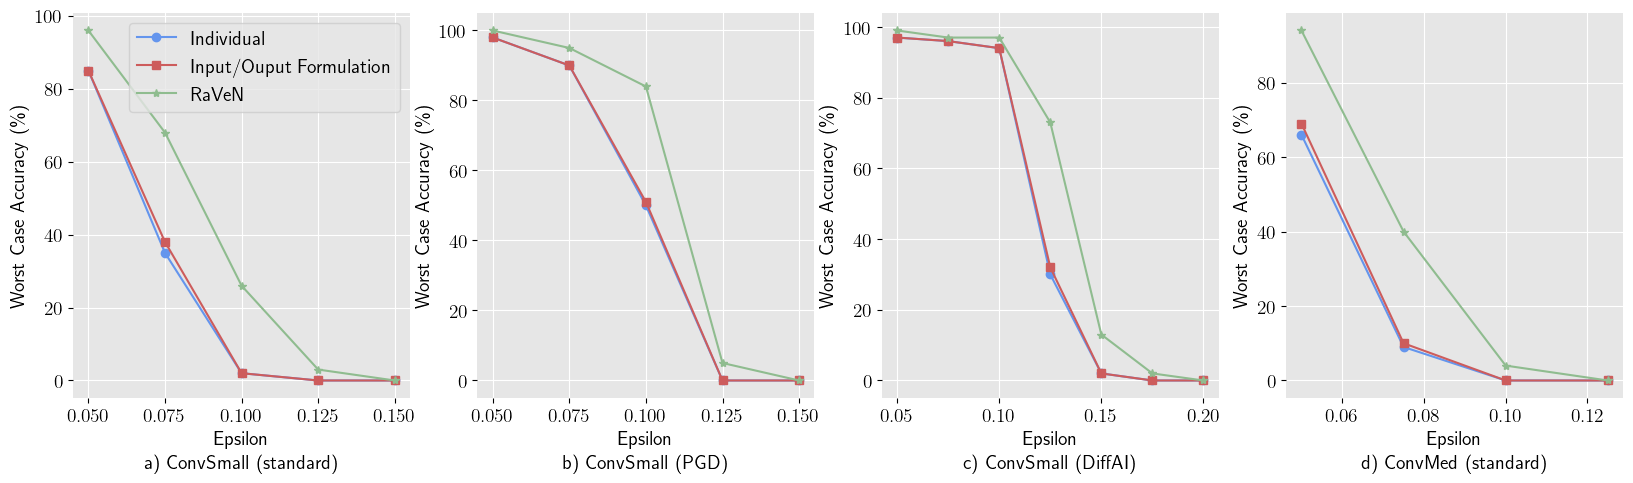

In [56]:
create_eps_graph([1,4], {'ConvSmall (standard)': 'mnist_convSmallRELU__Point', 'ConvSmall (PGD)': 'mnistconvSmallRELU__PGDK', 'ConvSmall (DiffAI)': 'mnistconvSmallRELUDiffAI', 'ConvMed (standard)': 'mnistconvMedGRELU__Point'}, folder = 'mnist_uap_results')

mnist_uap_results/mnist_relu_3_50.onnx_5_20_0.015.dat 0.015 (56.0, 58.0, 67.0)
mnist_uap_results/mnist_relu_3_50.onnx_5_20_0.035.dat 0.035 (0.0, 0.0, 2.0)
mnist_uap_results/mnist_relu_3_50.onnx_5_20_0.01.dat 0.01 (85.0, 85.0, 86.0)
mnist_uap_results/mnist_relu_3_50.onnx_5_20_0.025.dat 0.025 (13.0, 14.0, 18.0)
mnist_uap_results/mnist_relu_3_50.onnx_5_20_0.03.dat 0.03 (3.0, 3.0, 3.0)
mnist_uap_results/mnist_relu_3_50.onnx_5_20_0.02.dat 0.02 (27.0, 29.0, 37.0)
mnist_uap_results/mnist_relu_3_100.onnx_5_20_0.02.dat 0.02 (4.0, 4.0, 6.0)
mnist_uap_results/mnist_relu_3_100.onnx_5_20_0.025.dat 0.025 (1.0, 1.0, 2.0)
mnist_uap_results/mnist_relu_3_100.onnx_5_20_0.015.dat 0.015 (28.0, 30.0, 41.0)
mnist_uap_results/mnist_relu_3_100.onnx_5_20_0.03.dat 0.03 (0.0, 0.0, 0.0)
mnist_uap_results/mnist_relu_3_100.onnx_5_20_0.01.dat 0.01 (72.0, 72.0, 75.0)
mnist_uap_results/mnist_relu_3_100.onnx_5_20_0.035.dat 0.035 (0.0, 0.0, 0.0)


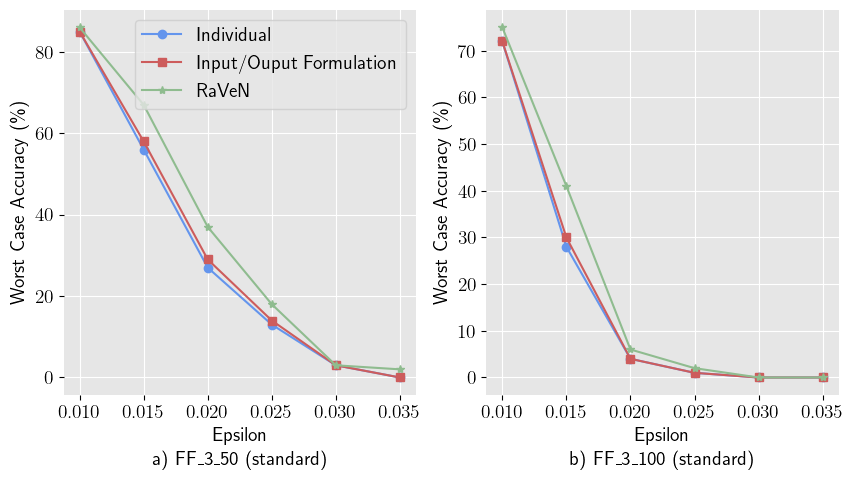

In [57]:
create_eps_graph([1,2], {'FF_3_50 (standard)': 'mnist_relu_3_50', 'FF_3_100 (standard)': 'mnist_relu_3_100'}, folder = 'mnist_uap_results')

targeted_attack/target_convSmallRELU__Point.onnx_5_20_0.00784313725490196.dat 0.00784313725490196 (13.9, 14.3, 33.3)
targeted_attack/target_convSmallRELU__Point.onnx_5_20_0.00392156862745098.dat 0.00392156862745098 (67.3, 68.1, 78.4)
targeted_attack/target_convSmallRELU__Point.onnx_5_20_0.01568627450980392.dat 0.01568627450980392 (0.0, 0.0, 0.2)
targeted_attack/target_convSmallRELU__Point.onnx_5_20_0.011764705882352941.dat 0.011764705882352941 (0.5, 0.6, 4.1)
targeted_attack/target_cifarconvSmallRELU__PGDK.onnx_5_20_0.00392156862745098.dat 0.00392156862745098 (84.0, 84.1, 85.8)
targeted_attack/target_cifarconvSmallRELU__PGDK.onnx_5_20_0.011764705882352941.dat 0.011764705882352941 (38.8, 39.8, 60.2)
targeted_attack/target_cifarconvSmallRELU__PGDK.onnx_5_20_0.00784313725490196.dat 0.00784313725490196 (71.2, 71.5, 80.9)
targeted_attack/target_cifarconvSmallRELU__PGDK.onnx_5_20_0.01568627450980392.dat 0.01568627450980392 (10.8, 11.2, 23.8)
targeted_attack/target_cifar10convSmallRELUDiffAI.

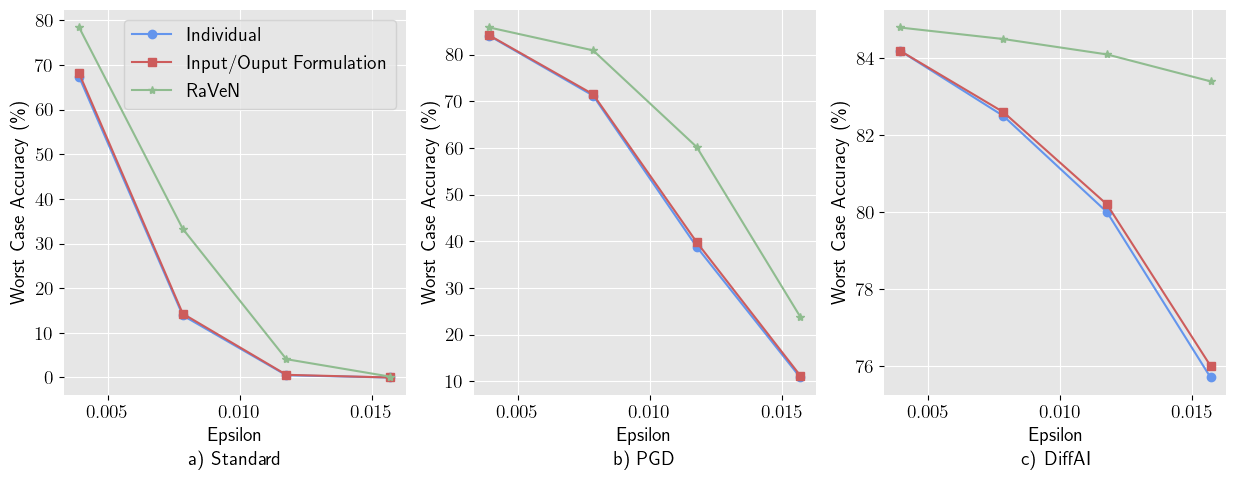

In [43]:
create_eps_graph([1, 3], {'Standard': 'target_convSmallRELU__Point', 'PGD': 'target_cifarconvSmallRELU__PGDK', 'DiffAI': 'target_cifar10convSmallRELUDiffAI'}, folder = 'targeted_attack', factor = 10)

newer_uap/convSmallRELU__Point.onnx_5_20_0.00196078431372549.dat 0.00196078431372549 (46.0, 48.0, 53.0)
newer_uap/convSmallRELU__Point.onnx_5_20_0.0058823529411764705.dat 0.0058823529411764705 (7.0, 7.0, 19.0)
newer_uap/convSmallRELU__Point.onnx_5_20_0.004901960784313725.dat 0.004901960784313725 (13.0, 13.0, 30.0)
newer_uap/convSmallRELU__Point.onnx_5_20_0.00392156862745098.dat 0.00392156862745098 (23.0, 24.0, 45.0)
newer_uap/convSmallRELU__Point.onnx_5_20_0.00784313725490196.dat 0.00784313725490196 (0.0, 0.0, 3.0)
newer_uap/convSmallRELU__Point.onnx_5_20_0.0029411764705882353.dat 0.0029411764705882353 (39.0, 39.0, 49.0)
newer_uap/convSmallRELU__Point.onnx_5_20_0.011764705882352941.dat 0.011764705882352941 (0.0, 0.0, 0.0)
newer_uap/convSmall_pgd_cifar.onnx_5_20_0.01568627450980392.dat 0.01568627450980392 (3.0, 3.0, 5.0)
newer_uap/convSmall_pgd_cifar.onnx_5_20_0.00784313725490196.dat 0.00784313725490196 (31.0, 30.9999999999997, 44.0)
newer_uap/convSmall_pgd_cifar.onnx_5_20_0.00392156862

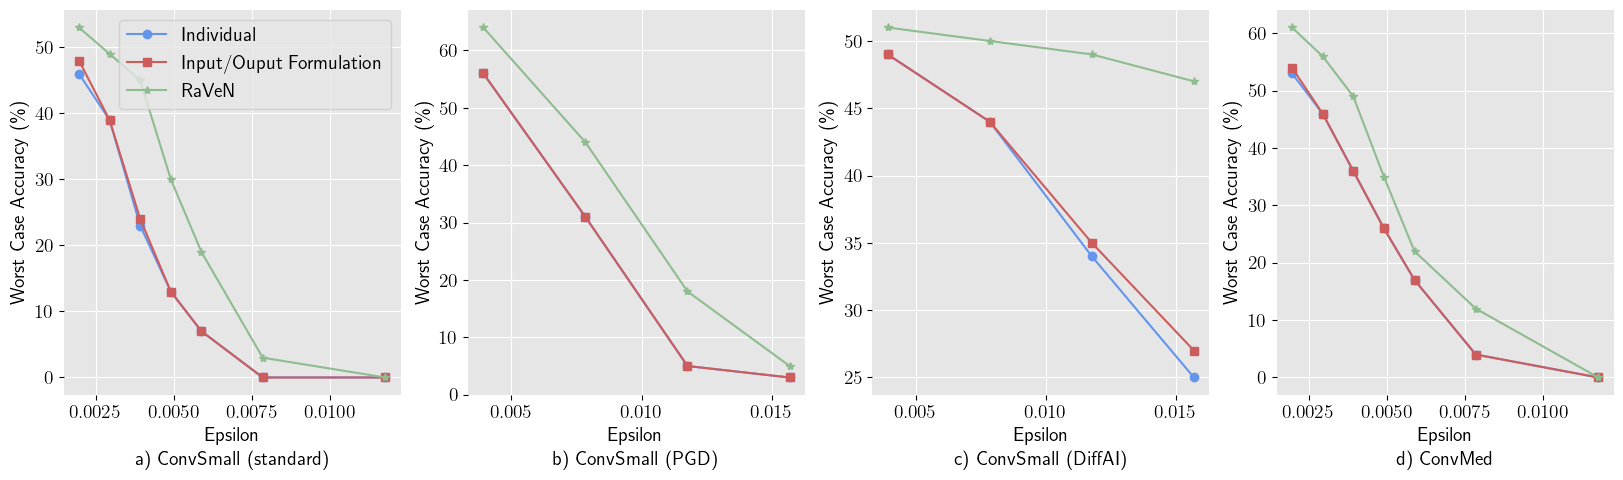

In [42]:
create_eps_graph([1, 4], {'ConvSmall (standard)': 'convSmallRELU__Point', 'ConvSmall (PGD)': 'convSmall_pgd', 'ConvSmall (DiffAI)': 'cifar10convSmallRELUDiffAI', 'ConvMed': 'convMed'}, folder = 'newer_uap')

hamming_2/mnist_binary.onnx_5_20_0.1.dat 0.1 (0.65, 0.95, 3.5)
hamming_2/mnist_binary.onnx_5_20_0.25.dat 0.25 (0.0, 0.0, 0.5)
hamming_2/mnist_binary.onnx_5_20_0.15.dat 0.15 (0.15, 0.15, 1.7)
hamming_2/mnist_binary.onnx_5_20_0.05.dat 0.05 (3.9, 3.95, 5.0)
hamming_2/mnist_binary.onnx_5_20_0.2.dat 0.2 (0.0, 0.0, 1.05)


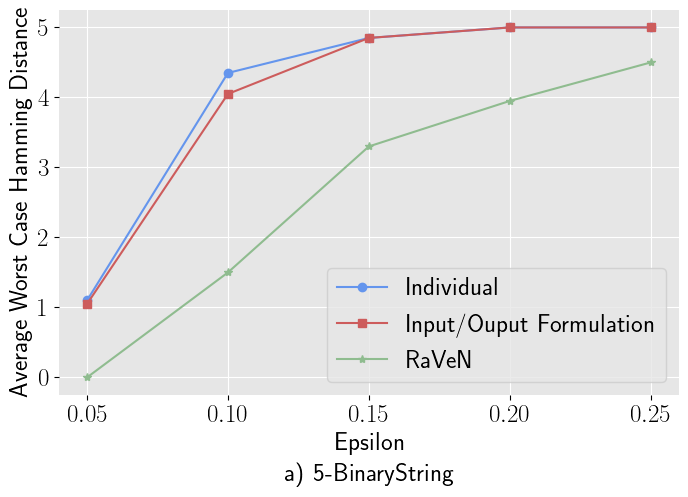

In [114]:
create_eps_graph([1, 1], {'5-BinaryString': 'mnist_binary.onnx_5'}, folder = 'hamming_2', factor = 20, yaxis = 'Average Worst Case Hamming Distance', flip = [5], font_size = 18, s1 = 8)

hamming_2/mnist_binary.onnx_10_20_0.15.dat 0.15 (0.15, 0.2, 3.7)
hamming_2/mnist_binary.onnx_10_20_0.1.dat 0.1 (1.05, 2.45, 7.2)
hamming_2/mnist_binary.onnx_10_20_0.05.dat 0.05 (7.75, 7.9, 10.0)
hamming_2/mnist_binary.onnx_10_20_0.25.dat 0.25 (0.0, 0.0, 0.85)
hamming_2/mnist_binary.onnx_10_20_0.2.dat 0.2 (0.0, 0.0, 2.05)


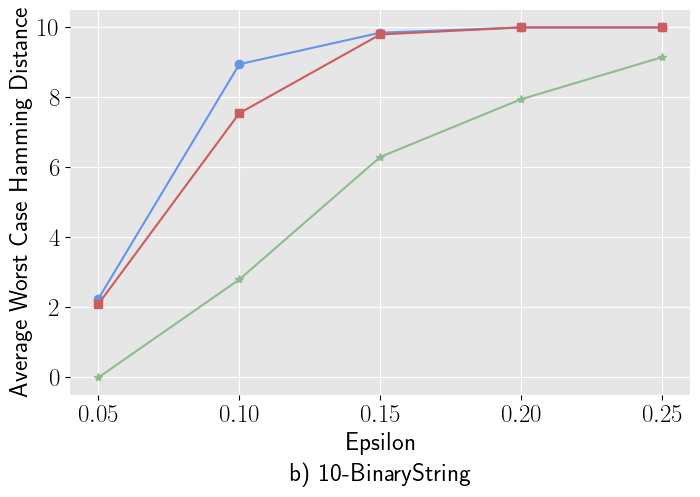

In [115]:
create_eps_graph([1, 1], {'10-BinaryString': 'mnist_binary.onnx_10'}, folder = 'hamming_2', factor = 20, yaxis = 'Average Worst Case Hamming Distance', move = 1, no_legend=True, flip = [10], font_size = 18, s1 = 8)

hamming_2/mnist_binary.onnx_15_20_0.1.dat 0.1 (1.5, 3.75, 10.9)
hamming_2/mnist_binary.onnx_15_20_0.15.dat 0.15 (0.15, 0.3, 5.85)
hamming_2/mnist_binary.onnx_15_20_0.05.dat 0.05 (11.45, 11.7, 15.0)
hamming_2/mnist_binary.onnx_15_20_0.25.dat 0.25 (0.0, 0.0, 1.7)
hamming_2/mnist_binary.onnx_15_20_0.2.dat 0.2 (0.0, 0.0, 3.8)


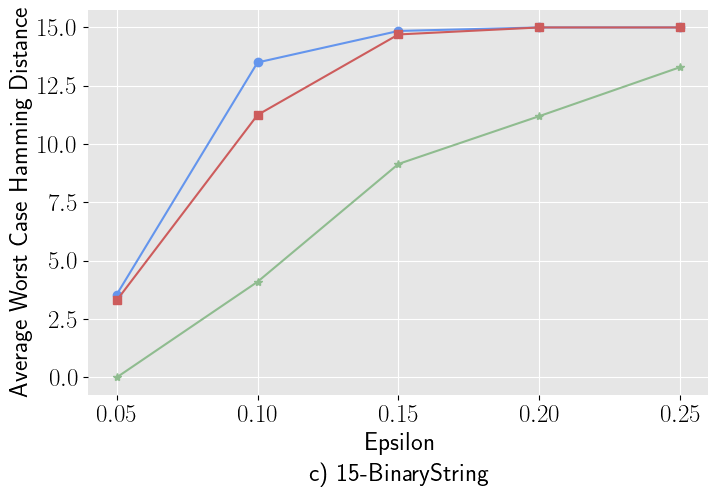

In [116]:
create_eps_graph([1, 1], {'15-BinaryString': 'mnist_binary.onnx_15'}, folder = 'hamming_2', factor = 20, yaxis = 'Average Worst Case Hamming Distance', move = 2, no_legend=True, flip = [15], font_size = 18, s1 = 8)

hamming_2/mnist_binary.onnx_5_20_0.1.dat 0.1 (0.65, 0.95, 3.5)
hamming_2/mnist_binary.onnx_5_20_0.25.dat 0.25 (0.0, 0.0, 0.5)
hamming_2/mnist_binary.onnx_5_20_0.15.dat 0.15 (0.15, 0.15, 1.7)
hamming_2/mnist_binary.onnx_5_20_0.05.dat 0.05 (3.9, 3.95, 5.0)
hamming_2/mnist_binary.onnx_5_20_0.2.dat 0.2 (0.0, 0.0, 1.05)
hamming_2/mnist_binary.onnx_10_20_0.15.dat 0.15 (0.15, 0.2, 3.7)
hamming_2/mnist_binary.onnx_10_20_0.1.dat 0.1 (1.05, 2.45, 7.2)
hamming_2/mnist_binary.onnx_10_20_0.05.dat 0.05 (7.75, 7.9, 10.0)
hamming_2/mnist_binary.onnx_10_20_0.25.dat 0.25 (0.0, 0.0, 0.85)
hamming_2/mnist_binary.onnx_10_20_0.2.dat 0.2 (0.0, 0.0, 2.05)
hamming_2/mnist_binary.onnx_15_20_0.1.dat 0.1 (1.5, 3.75, 10.9)
hamming_2/mnist_binary.onnx_15_20_0.15.dat 0.15 (0.15, 0.3, 5.85)
hamming_2/mnist_binary.onnx_15_20_0.05.dat 0.05 (11.45, 11.7, 15.0)
hamming_2/mnist_binary.onnx_15_20_0.25.dat 0.25 (0.0, 0.0, 1.7)
hamming_2/mnist_binary.onnx_15_20_0.2.dat 0.2 (0.0, 0.0, 3.8)


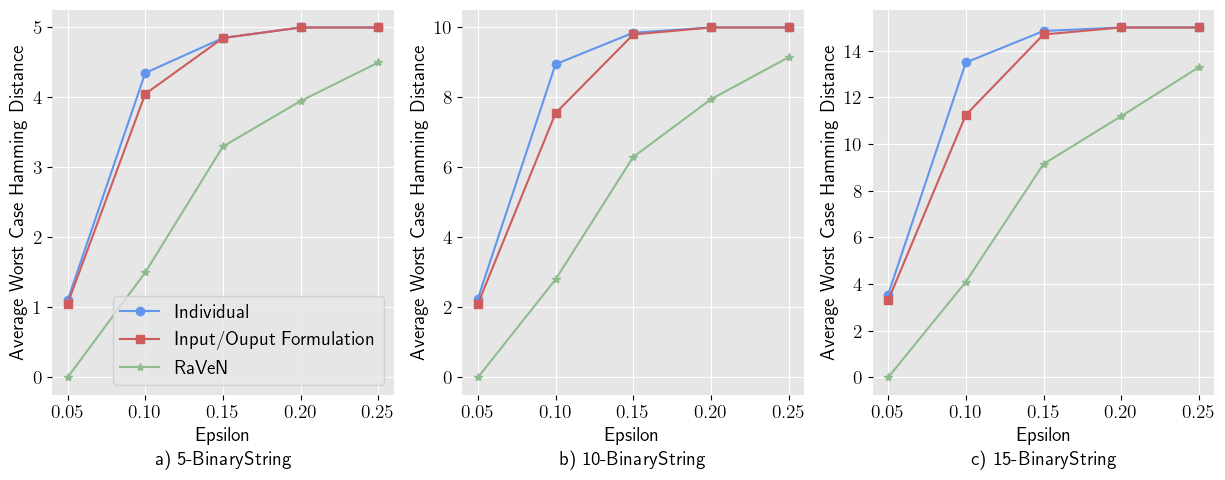

In [110]:
create_eps_graph([1, 3], {'5-BinaryString': 'mnist_binary.onnx_5', '10-BinaryString': 'mnist_binary.onnx_10', '15-BinaryString': 'mnist_binary.onnx_15'}, folder = 'hamming_2', factor = 20, yaxis = 'Average Worst Case Hamming Distance', flip = [5, 10, 15])

hamming_2/mnist_binary.onnx_5_20_0.1.dat 0.1 (0.65, 0.95, 3.5)
hamming_2/mnist_binary.onnx_5_20_0.25.dat 0.25 (0.0, 0.0, 0.5)
hamming_2/mnist_binary.onnx_5_20_0.15.dat 0.15 (0.15, 0.15, 1.7)
hamming_2/mnist_binary.onnx_5_20_0.05.dat 0.05 (3.9, 3.95, 5.0)
hamming_2/mnist_binary.onnx_5_20_0.2.dat 0.2 (0.0, 0.0, 1.05)
hamming_2/mnist_binary.onnx_10_20_0.15.dat 0.15 (0.15, 0.2, 3.7)
hamming_2/mnist_binary.onnx_10_20_0.1.dat 0.1 (1.05, 2.45, 7.2)
hamming_2/mnist_binary.onnx_10_20_0.05.dat 0.05 (7.75, 7.9, 10.0)
hamming_2/mnist_binary.onnx_10_20_0.25.dat 0.25 (0.0, 0.0, 0.85)
hamming_2/mnist_binary.onnx_10_20_0.2.dat 0.2 (0.0, 0.0, 2.05)
hamming_2/mnist_binary.onnx_15_20_0.1.dat 0.1 (1.5, 3.75, 10.9)
hamming_2/mnist_binary.onnx_15_20_0.15.dat 0.15 (0.15, 0.3, 5.85)
hamming_2/mnist_binary.onnx_15_20_0.05.dat 0.05 (11.45, 11.7, 15.0)
hamming_2/mnist_binary.onnx_15_20_0.25.dat 0.25 (0.0, 0.0, 1.7)
hamming_2/mnist_binary.onnx_15_20_0.2.dat 0.2 (0.0, 0.0, 3.8)


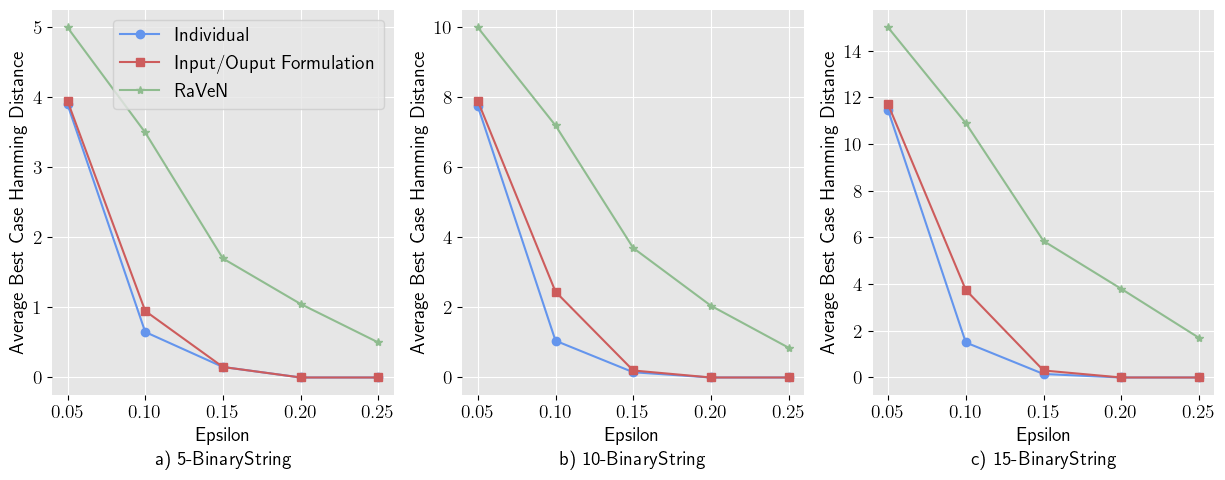

In [111]:
create_eps_graph([1, 3], {'5-BinaryString': 'mnist_binary.onnx_5', '10-BinaryString': 'mnist_binary.onnx_10', '15-BinaryString': 'mnist_binary.onnx_15'}, folder = 'hamming_2', factor = 20, yaxis = 'Average Best Case Hamming Distance')

In [54]:
def print_runtimes(names, folder = '', eps_des = [0.015, 0.075]):
    for k, name in enumerate(names):
        #print(name)
        current_list = glob.glob(f'{folder}/{name}*.dat')
        for file in current_list:
            f = open(file, "r")
            lines = f.readlines()
            eps = float(lines[-6].split(' ')[-1][:-1])
            if k < 2:
                if eps != eps_des[0]:
                    continue
            else:
                if eps != eps_des[1]:
                    continue

            vals = [format(float(i)/20, '.2f') for j,i in enumerate((lines[-1].split('[')[-1][:-2].split(', '))) if j < 3]
            vals = [vals[0], vals[1], vals[2]]#, format(float(vals[2]) - float(vals[3]) - float(vals[4]), '.2f'), vals[3], vals[4]]
            print(' & '.join(vals) + ' \\\\')

In [36]:
current_list = glob.glob(f'mnist_uap_results/*.dat')

In [68]:
print_runtimes(['mnist_relu_3_50', 'mnist_relu_3_100', 'mnist_convSmallRELU__Point', 'mnistconvSmallRELU__PGDK', 'mnistconvSmallRELUDiffAI', 'mnistconvMedGRELU__Point'], folder = 'mnist_uap_results', eps_des = [0.015, 0.1])

0.01 & 0.08 & 0.77 \\
0.01 & 0.08 & 4.20 \\
0.11 & 0.16 & 400.99 \\
0.12 & 0.17 & 273.61 \\
0.08 & 0.12 & 26.32 \\
0.24 & 0.32 & 136.14 \\


In [52]:
print_runtimes(['convSmallRELU__Point', 'convSmall_pgd', 'cifar10convSmallRELUDiffAI', 'convMed'], folder = 'newer_uap', eps_des = [1/255, 1/255])

0.52 & 0.87 & 24.97 \\
0.49 & 0.60 & 12.42 \\
0.62 & 0.71 & 14.21 \\
1.72 & 1.97 & 176.59 \\


In [56]:
def get_values(name, folder = 'targeted_attack'):
    ind = np.zeros(10)
    base = np.zeros(10)
    uap = np.zeros(10)
    current_list = glob.glob(f'{folder}/{name}*.dat')
    for file in current_list:
        f = open(file, "r")
        lines = f.readlines()
        eps = float(lines[-6].split(' ')[-1][:-1])
        ind += [float(i) for i in (lines[-5].split('[')[-1].split(']')[0]).split(', ')]
        base += [float(i) for i in (lines[-4].split('[')[-1].split(']')[0]).split(', ')]
        uap += [float(i) for i in (lines[-3].split('[')[-1].split(']')[0]).split(', ')]
        #vals = [vals[0], vals[1], vals[2], format(float(vals[2]) - float(vals[3]) - float(vals[4]), '.2f'), vals[3], vals[4]]
        #print(' & '.join(vals) + ' \\\\')
    print((ind/4).tolist())
    print((base/4).tolist())
    print((uap/4).tolist())

In [65]:
get_values('target_convSmallRELU__Point')

[19.25, 24.5, 16.75, 19.75, 18.5, 20.5, 21.5, 20.25, 24.0, 19.25]
[19.75, 24.75, 17.0, 20.0, 19.0, 21.0, 21.75, 20.5, 24.0, 19.75]
[27.25, 31.5, 24.5, 27.0, 27.75, 29.25, 31.0, 28.0, 34.75, 29.0]


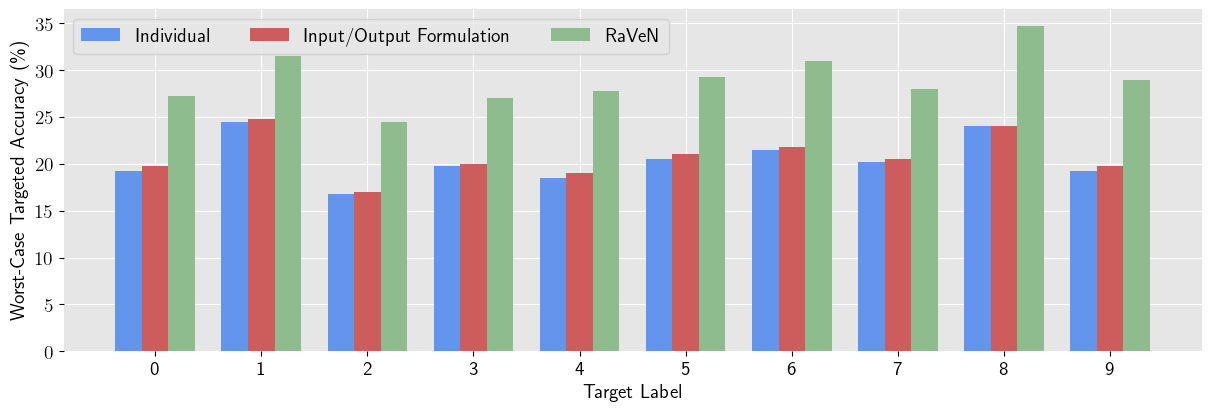

In [72]:
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
    axisbelow=True, grid=True)
plt.rcParams.update({'font.size': 14})

plt.rc('grid', color='w', linestyle='solid')
            # axs[i].plot(xs, ind_verifieds, label='Individual', linestyle = '-', marker = 'o', color='cornflowerblue')
            # axs[i].plot(xs, base_verifieds, label='Input/Ouput Formulation', linestyle = '-', marker = 's', color='indianred')
            # axs[i].plot(xs, uap_verifieds, label='DNN Relational Verifier', linestyle = '-', marker = '*', color='darkseagreen')


verified_amount = {
    'Individual': [19.25, 24.5, 16.75, 19.75, 18.5, 20.5, 21.5, 20.25, 24.0, 19.25],
    'Input/Output Formulation': [19.75, 24.75, 17.0, 20.0, 19.0, 21.0, 21.75, 20.5, 24.0, 19.75],
    'RaVeN': [27.25, 31.5, 24.5, 27.0, 27.75, 29.25, 31.0, 28.0, 34.75, 29.0],
}

x = np.arange(10)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize = (12, 4))

for attribute, measurement in verified_amount.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color='cornflowerblue' if attribute == 'Individual' else 'indianred' if attribute == 'Input/Output Formulation' else 'darkseagreen')
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Worst-Case Targeted Accuracy (\%)')
ax.set_xlabel('Target Label')
ax.set_xticks(x + width, x)
ax.legend(loc='upper left', ncols=3)
#ax.bar_label(False)
#ax.set_ylim(0, 30)

plt.show()

In [4]:
def create_mono_graph(shape, names, folder = 'mono', factor = 1, yaxis = 'Verified Percentage (\%)', move = 0, no_legend = False):
    plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True)
    
    plt.rcParams.update({'font.size': 18})
    
    plt.rc('grid', color='w', linestyle='solid')
    fig, axs = plt.subplots(*shape, figsize = ((shape[1]) * 8, (shape[0]) * 5))
    data = {}
    for i, (formal_name, name) in enumerate(names.items()):
        data[formal_name] = {}
        current_list = glob.glob(f'{folder}/{name}*.dat')
        xs = []
        ind_verifieds = []
        base_verifieds = []
        uap_verifieds = []
        for file in current_list:
            f = open(file, "r")
            lines = f.readlines()
            eps = float(lines[-2].split(' ')[-1][:-1])
            xs.append(eps)
            uap_verified = float(lines[-1].split(' ')[-1][:-1])/factor
            uap_verifieds.append(uap_verified)
            #times = list(lines[-1].split(' ')[-1][:-1])
            #print(eps, ind_verified, base_verified, uap_verified, times)
            #print(lines[-6:])
        if not xs:
            xs = [0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045]
            ind_verifieds = [0 for _ in range(8)]
            base_verifieds = [0 for _ in range(8)]
            uap_verifieds = [0 for _ in range(8)]
        else:
            idx = sorted(range(len(xs)), key=lambda k: xs[k])
            xs = [xs[i] for i in idx]
            uap_verifieds = [uap_verifieds[i] for i in idx]
        if len(names) == 1:
            axs.plot(xs, uap_verifieds, label='DiffPoly', linestyle = '-', marker = '*', color='darkseagreen')
            if not no_legend:
                axs.legend(loc="upper right")
            #axs.set_xlabel('Epsilon')
            axs.set_xlabel(r'\begin{center}Epsilon\\*{' + chr(97 + move + i) + '}) {' + formal_name + '}\end{center}')
            #axs.set_xlabel(r'\begin{center}Epsilon\\*{' + formal_name + '}\end{center}')
            axs.set_ylabel(yaxis)
            #axs.set_ylim(0, 100)  
        elif shape[0] == 1:
            axs[i].plot(xs, uap_verifieds, label='DiffPoly', linestyle = '-', marker = '*', color='darkseagreen')
            if i == 0:
                axs[i].legend(loc="upper right")
            axs[i].set_xlabel(r'\begin{center}Epsilon\\*{' + chr(97 + i) + '}) {' + formal_name + '}\end{center}')
            axs[i].set_ylabel(yaxis)
            #axs[i].set_ylim(0, 100)
        else:
            axs[int(i/shape[1])][int(i%shape[1])].plot(xs, uap_verifieds, label='DiffPoly', linestyle = '-', marker = '*', color='darkseagreen')
            if i == 0:
                axs[int(i/shape[1])][int(i%shape[1])].legend(loc="upper right")
            axs[int(i/shape[1])][int(i%shape[1])].set_xlabel(r'\begin{center}Epsilon\\*{' + chr(97 + i) + '}) {' + formal_name + '}\end{center}')
            axs[int(i/shape[1])][int(i%shape[1])].set_ylabel(yaxis)
            #axs[int(i/shape[1])][int(i%shape[1])].set_ylim(0, 100)   
    


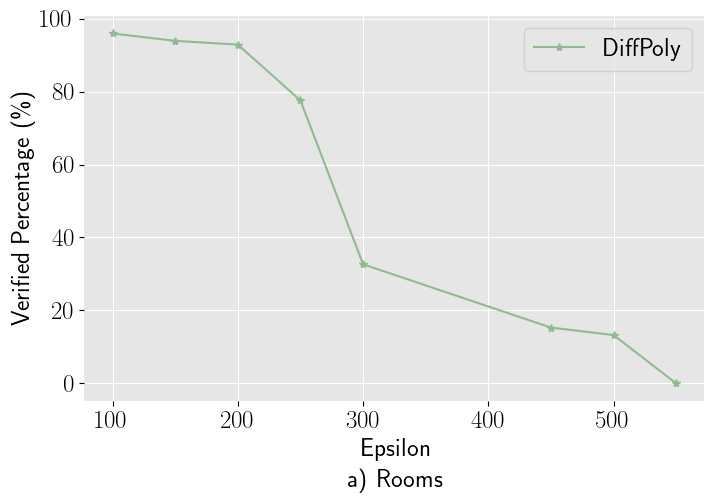

In [95]:
create_mono_graph([1,1], {'Rooms': 'monotonic.onnx_4'}, folder = 'mono', factor = 98/100)

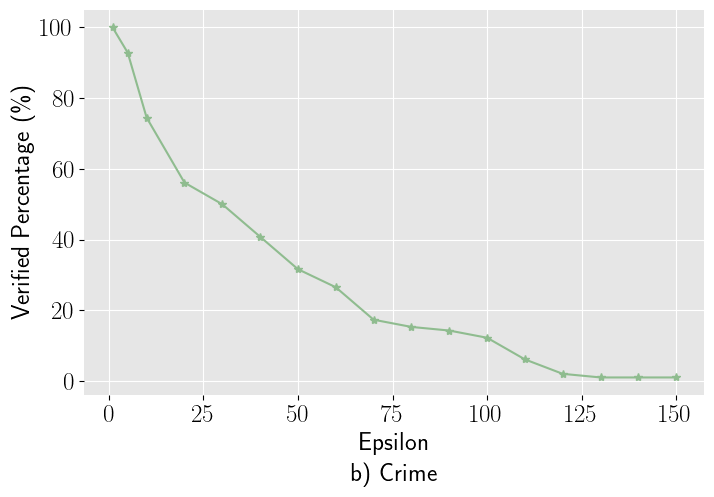

In [96]:
create_mono_graph([1,1], {'Crime': 'monotonic.onnx_0'}, folder = 'mono', factor = 98/100, move = 1, no_legend = True)

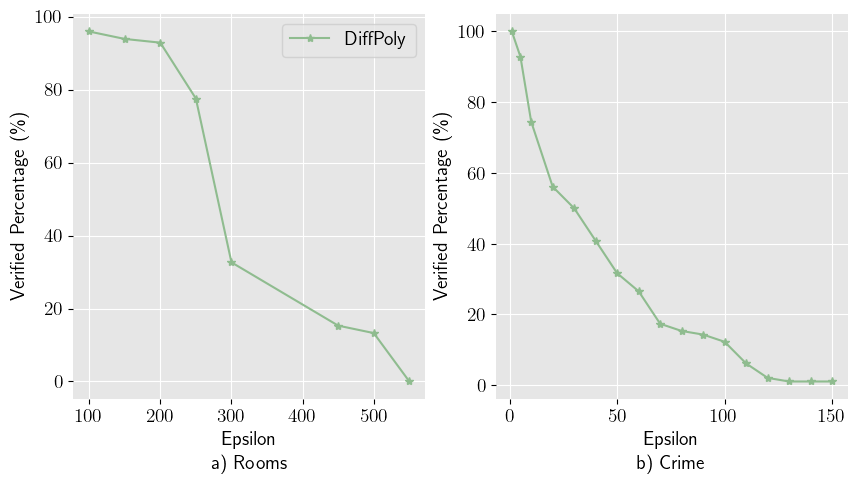

In [47]:
create_mono_graph([1,2], {'Rooms': 'monotonic.onnx_4', 'Crime': 'monotonic.onnx_0'}, folder = 'mono', factor = 98/100)

In [5]:
def create_layer_graph(shape, names, folder = 'param_search', factor = 1, yaxis = 'Worst Case Accuracy (\%)', flip = [15]):
    plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True)
    plt.rcParams.update({'font.size': 14})
    plt.rc('grid', color='w', linestyle='solid')
    fig, axs = plt.subplots(*shape, figsize = ((shape[1]) * 5, (shape[0]) * 5))
    data = {}
    for i, (formal_name, name) in enumerate(names.items()):
        data[formal_name] = {}
        current_list = glob.glob(f'{folder}/{name}*.dat')
        xs = []
        ind_verifieds = []
        base_verifieds = []
        layerwise_verifieds = []
        uap_verifieds = []
        for file in current_list:
            f = open(file, "r")
            lines = f.readlines()
            eps = float(lines[-7].split(' ')[-1][:-1])
            xs.append(eps)
            ind_verified = float(lines[-6].split(' ')[-1][:-1])/factor
            ind_verifieds.append(ind_verified)
            base_verified = float(lines[-5].split(' ')[-1][:-1])/factor
            base_verifieds.append(base_verified)    
            layerwise_verified = float(lines[-4].split(' ')[-1][:-1])/factor
            layerwise_verifieds.append(layerwise_verified)
            uap_verified = float(lines[-3].split(' ')[-1][:-1])/factor
            uap_verifieds.append(uap_verified)
            print(file, eps, (ind_verified, base_verified,layerwise_verified, uap_verified))
            #data[formal_name][eps] = (ind_verified, base_verified, uap_verified)
            #times = list(lines[-1].split(' ')[-1][:-1])
            #print(eps, ind_verified, base_verified, uap_verified, times)
            #print(lines[-6:])
        if not xs:
            xs = [0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045]
            ind_verifieds = [0 for _ in range(8)]
            base_verifieds = [0 for _ in range(8)]
            layerwise_verifieds = [0 for _ in range(8)]
            uap_verifieds = [0 for _ in range(8)]
        else:
            idx = sorted(range(len(xs)), key=lambda k: xs[k])
            xs = [xs[i] for i in idx]
            
            if len(flip) != 0:
                ind_verifieds = [flip[0] - ind_verifieds[j] for j in idx]
                base_verifieds = [flip[0] - base_verifieds[j] for j in idx]
                layerwise_verifieds = [flip[0] - layerwise_verifieds[j] for j in idx]
                uap_verifieds = [flip[0] - uap_verifieds[j] for j in idx]
            else:
                ind_verifieds = [ind_verifieds[j] for j in idx]
                base_verifieds = [base_verifieds[j] for j in idx]
                layerwise_verifieds = [layerwise_verifieds[j] for j in idx]
                uap_verifieds = [uap_verifieds[j] for j in idx]
        
        if len(names) == 1:
            axs.plot(xs, ind_verifieds, label='Individual', linestyle = '-', marker = 'o', color='cornflowerblue')
            axs.plot(xs, base_verifieds, label='Input/Ouput Formulation', linestyle = '-', marker = 's', color='indianred')
            axs.plot(xs, layerwise_verifieds, label='Layerwise Formulation', linestyle = '-', marker = '^', color='gray')
            axs.plot(xs, uap_verifieds, label='RaVeN', linestyle = '-', marker = '*', color='darkseagreen')
            axs.legend(loc="upper right")
            axs.set_xlabel('Epsilon')
            #axs.set_xlabel(r'\begin{center}Epsilon\\*{' + formal_name + '}\end{center}')
            axs.set_ylabel(yaxis)
            #axs.set_ylim(0, 100)  

hamming_comp/hamming_0.2.dat 0.2 (0.0, 0.0, 2.7, 3.8)
hamming_comp/hamming_0.25.dat 0.25 (0.0, 0.0, 1.1, 1.7)
hamming_comp/hamming_0.1.dat 0.1 (1.5, 3.75, 10.9, 10.9)
hamming_comp/hamming_0.15.dat 0.15 (0.15, 0.15, 5.0, 5.85)


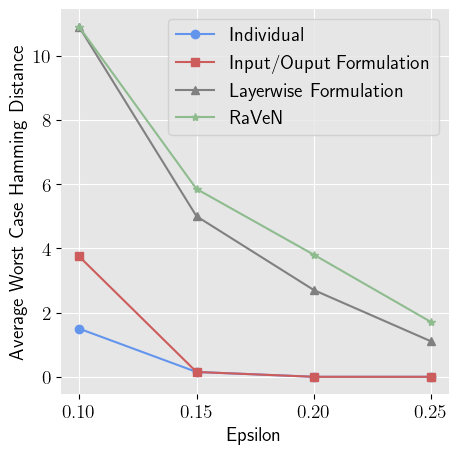

In [67]:
create_layer_graph([1, 1], {'15-BinaryString': 'hamming'}, folder = 'hamming_comp', factor = 20, yaxis = 'Average Worst Case Hamming Distance', flip = [15])